In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Equation d'onde

${\large u_{tt}=c^2 u_{xx} \, \mbox{  pour  } \begin{cases} 0 <x<L ,\\ 0 <t \end{cases} }$

CI:
---- 
- ${\large u(x,0)=\begin{cases} \frac{1}{2}(1-cos(\frac{2\pi x}{a})) \quad si \quad 0 <x<a ,\\ 0 \quad autrement \end{cases} }$ et ${\large u_{t}(x,0)= 0 }$
- ${\large u(x,0)=\begin{cases} 1 \quad si \quad 0 <x<a ,\\ 0 \quad autrement \end{cases} }$ et ${\large u_{t}(x,0)= 0 }$

CF:
---
${\large u(-L,t)=0 }$ et ${\large u(L,0)= 0 }$



In [2]:
def wave(U0,c,x,tmax,lmb):
    h=np.abs(x[1]-x[0])
    k=lmb*h/(abs(c))
    M=int(np.round(tmax/k))+1
    t=np.linspace(0.,tmax,M)
    k=t[1]-t[0]
    lmb=c*k/h
    A=np.diagflat(lmb**2*np.ones(N-1),-1)+np.diagflat(2*(1-lmb**2)*np.ones(N))+np.diagflat(lmb**2*np.ones(N-1),1)
    U=np.zeros((np.shape(x)[0],np.shape(t)[0]))
    U[:,0]=U0
    U[:,1]=U0
    for i in range(1,M-1):
        U[1:-1,i+1]=A@U[1:-1,i]-U[1:-1,i-1]
        U[0,i+1]=0
        U[-1,i+1]=0
    return(U,x,t,lmb)

def f(y,a):
    k=y.size
    h=np.zeros(k)
    for p in range(k):
        if y[p]>=0. and y[p]<=a:
            h[p]=0.5*(1.-np.cos(2.*np.pi/a*y[p]))
    return(h)

def square_Init(x,x1,x2,yy):
    y=np.zeros(np.size(x))
    for i in range(np.size(x)):
        if x[i]>x1 and x[i]<x2:
            y[i]=yy
    return(y)


In [106]:
tmax=0.5
c=1
N=199  #199
L=0.5
x=np.linspace(-L,L,N+2)
a=0.1
lmb=0.5

#Conditions initiales
U0_cos=f(x,a)
U0_carre=square_Init(x,0,a,1)

U_cos=wave(U0_cos,c,x,tmax,lmb)
U_carre=wave(U0_carre,c,x,tmax,lmb)



In [107]:
t=U_cos[2]
M=t.shape[0]
xsol=np.linspace(-L,L,1001)
Sol_cos=np.zeros((1001,M))
Sol_carre=np.zeros((1001,M))

for i in range(M):
    if t[i]<(L-a)/c:
        Sol_cos[:,i]=0.5*f(xsol-c*t[i],a)+0.5*f(xsol+c*t[i],a)
        Sol_carre[:,i]=0.5*square_Init(xsol-c*t[i],0,a,1)+0.5*square_Init(xsol+c*t[i],0,a,1)
    else:
        Sol_cos[:,i]=0.5*f(xsol-c*t[i],a)+0.5*f(xsol+c*t[i],a)-0.5*f(2*L-xsol-c*t[i],a)-0.5*f(-2*L-xsol+c*t[i],a)
        Sol_carre[:,i]=0.5*square_Init(xsol-c*t[i],0,a,1)+0.5*square_Init(xsol+c*t[i],0,a,1)-0.5*square_Init(2*L-xsol-c*t[i],0,a,1)-0.5*square_Init(-2*L-xsol+c*t[i],0,a,1)

0.49999999999999956


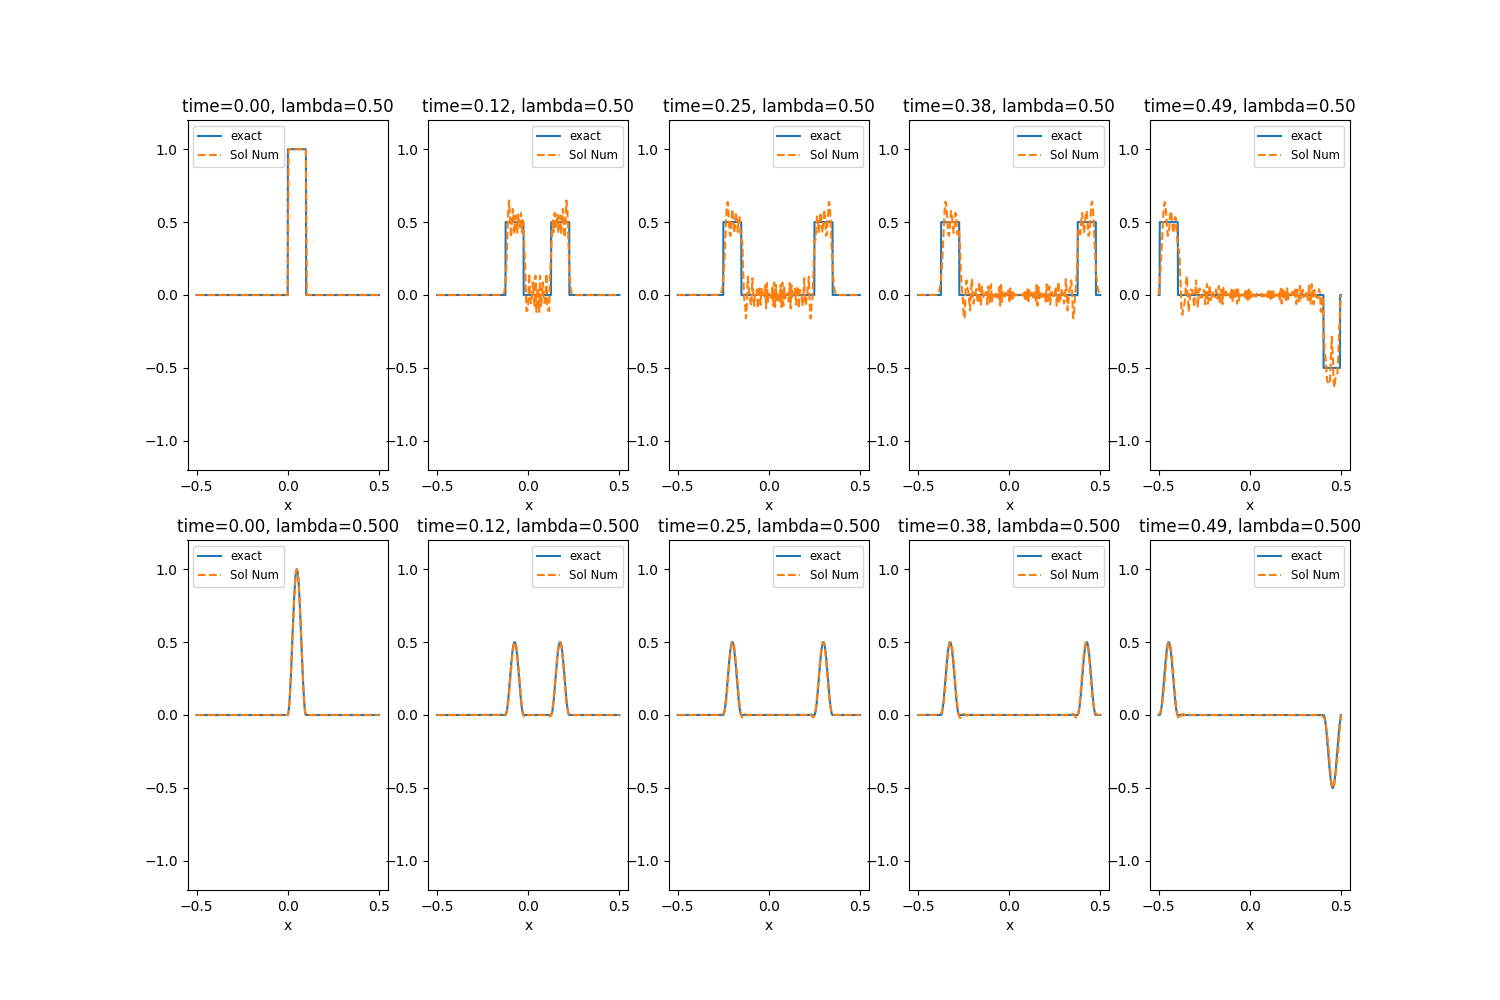

In [108]:
print(U_cos[3])
Mspan=[0,0.25,0.5,0.75,0.99]
fig,ax=plt.subplots(2,5,figsize=(15,10))
for i in range(len(Mspan)):
    n=int(np.floor(M*Mspan[i]))
    ax[0,i].plot(xsol,Sol_carre[:,n],label='exact')
    ax[0,i].plot(x,U_carre[0][:,n],label='Sol Num',linestyle='--')
    ax[0,i].legend(loc='best',fontsize='small')
    ax[0,i].set_xlabel('x')
    #ax[i].set_ylabel('u')
    ax[0,i].set_ylim((-1.2,1.2))
    ax[0,i].set_title('time=%.2f, lambda=%.2f'%(U_carre[2][n],U_carre[3]))
    ax[1,i].plot(xsol,Sol_cos[:,n],label='exact')
    ax[1,i].plot(x,U_cos[0][:,n],label='Sol Num',linestyle='--')
    ax[1,i].legend(loc='best',fontsize='small')
    ax[1,i].set_xlabel('x')
    #ax[i].set_ylabel('u')
    ax[1,i].set_ylim((-1.2,1.2))
    ax[1,i].set_title('time=%.2f, lambda=%.3f'%(U_cos[2][n],U_cos[3]))
plt.show()

Text(0.5, 1.0, '$\\frac{\\theta_{d}}{\\theta_{a}}$')

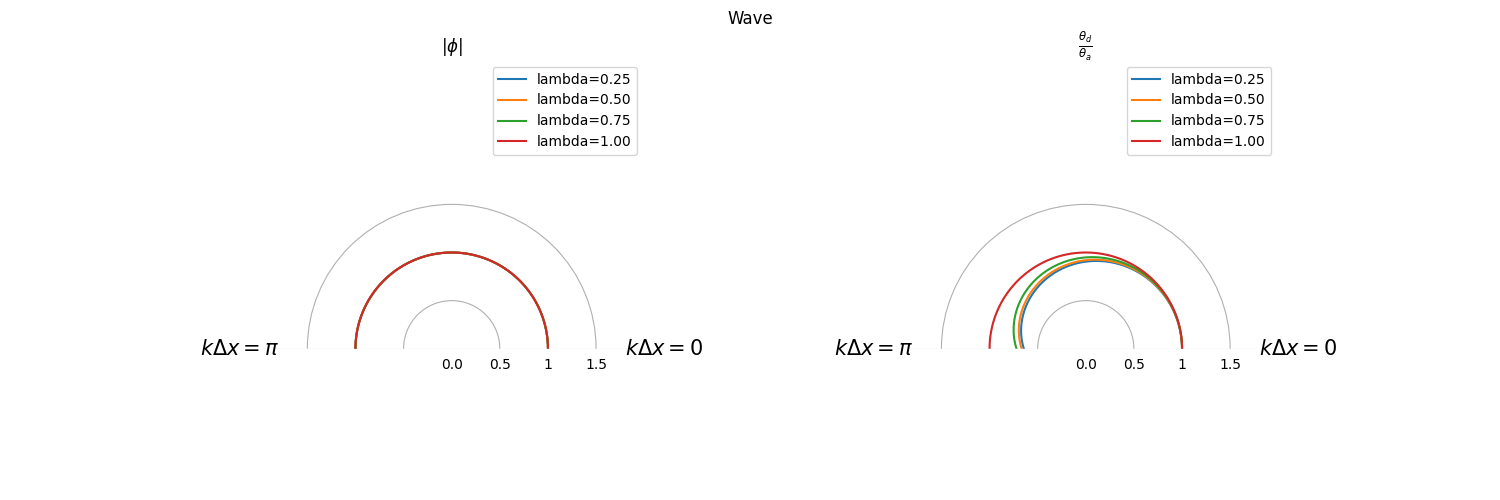

In [109]:
ko=np.linspace(0.01,np.pi-0.001,100)

lmb=[0.25,0.5,0.75,1]

fig,ax=plt.subplots(1,2,figsize=(15,5),subplot_kw=dict(polar=True))

for i in range(len(lmb)):
    ampl=1-2*lmb[i]**2*np.sin(ko/2)**2+np.sqrt((1-2*lmb[i]**2*np.sin(ko/2)**2)**2-1+0j)
    ratio=np.arctan2(np.imag(ampl),np.real(ampl))/(-lmb[i]*ko)
    ax[0].plot(ko,np.sqrt(np.real(ampl)**2+np.imag(ampl)**2),label='lambda=%.2f'%(lmb[i]))
    ax[1].plot(ko,np.abs(ratio),label='lambda=%.2f'%(lmb[i]))

fig.suptitle('Wave')
ax[0].set_rmax(2)
ax[0].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[0].set_frame_on(False)
ax[0].set_thetamax(180)
ax[0].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[0].legend()
ax[0].set_title(r'$|\phi |$')
ax[1].set_rmax(2)
ax[1].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[1].set_frame_on(False)
ax[1].set_thetamax(180)
ax[1].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[1].legend()
ax[1].set_title(r'$\frac{\theta_{d}}{\theta_{a}}$')



0.49999999999999956
0.49999999999999956


[Text(0.0, 0, '0'),
 Text(314.15926535897904, 0, '$\\frac{\\pi}{2}$'),
 Text(628.3185307179581, 0, '$\\pi$')]

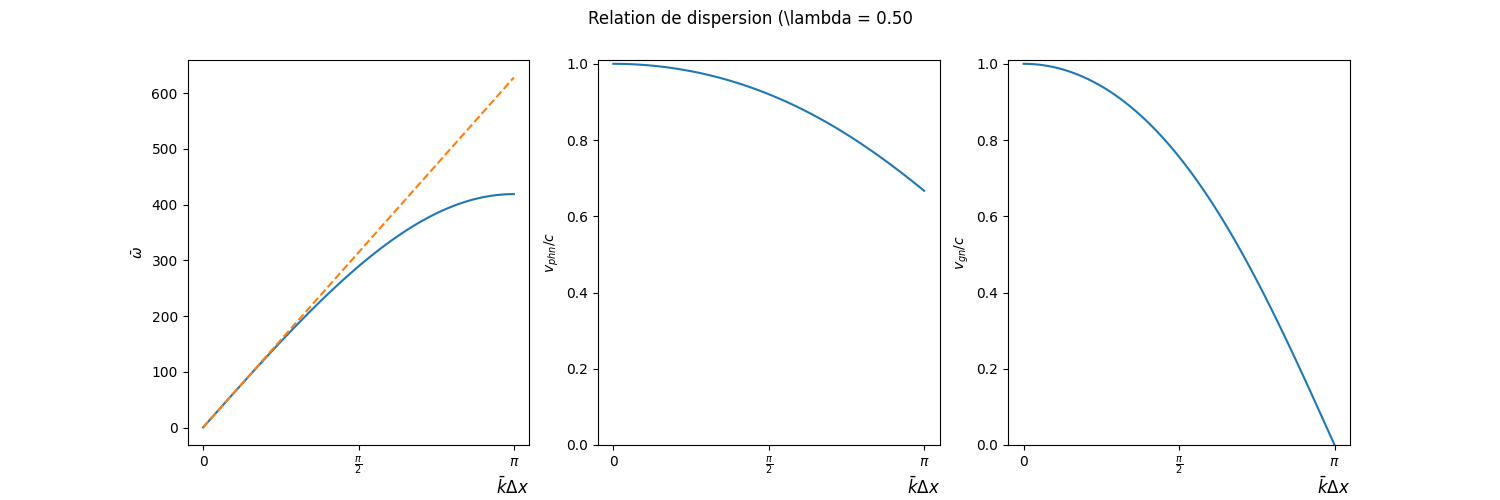

In [124]:
h=x[1]-x[0]
k=t[1]-t[0]
lmb=U_cos[3]
print(lmb)
print(c*k/h)
ko=np.linspace(0.01,(np.pi-0.001)/h,100)
omeg_d=(2/k)*np.lib.scimath.arcsin(lmb*np.sin(ko*h/2))


v_phn=(omeg_d/ko)/c
v_gn=(c*np.cos(ko*h/2)/np.sqrt(1-lmb**2*np.sin(ko*h/2)**2))/c
fig,ax=plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Relation de dispersion (\lambda = %.2f'%(lmb))

ax[0].plot(ko,omeg_d)
ax[0].set_xlabel(r'$\bar{k} \Delta x $',fontsize=12,loc='right',labelpad=0.0001)
ax[0].set_ylabel(r'$\bar{\omega}$')
ax[0].plot(ko,ko,linestyle='--')
ax[0].set_xticks([0.0,np.pi/(2*h), np.pi/h])
ax[0].set_xticklabels(('0',r'$\frac{\pi}{2}$', r'$\pi$'),fontsize=10)
ax[1].plot(ko,v_phn)
ax[1].set_xlabel(r'$\bar{k} \Delta x $',fontsize=12,loc='right',labelpad=0.0001)
ax[1].set_ylabel(r'$v_{phn}/c$')
ax[1].set_ylim((0,1.01))
ax[1].set_xticks([0.0,np.pi/(2*h), np.pi/h])
ax[1].set_xticklabels(('0',r'$\frac{\pi}{2}$', r'$\pi$'),fontsize=10)
ax[2].plot(ko,v_gn)
ax[2].set_xlabel(r'$\bar{k} \Delta x $',fontsize=12,loc='right',labelpad=0.0001)
ax[2].set_ylabel(r'$v_{gn}/c$')
ax[2].set_ylim((0,1.01))
ax[2].set_xticks([0.0,np.pi/(2*h), np.pi/h])
ax[2].set_xticklabels(('0',r'$\frac{\pi}{2}$', r'$\pi$'),fontsize=10)



# Equation d'onde amortie

${\large u_{tt}+au_{t}=c^2 u_{xx}}$

CI: 
--
${\large u(x,0)=e^{-\sigma x^{2}} }$ et ${\large u_{t}(x,0)= 0 }$

CF:
--
${\large u(-L,t)=0 }$ et ${\large u(L,0)= 0 }$


In [125]:
def damped_wave(U0,c,a,x,tmax,lmb):
    h=np.abs(x[1]-x[0])
    k=lmb*h/(abs(c))
    M=int(np.round(tmax/k))+1
    t=np.linspace(0.,tmax,M)
    k=t[1]-t[0]
    lmb=np.abs(c)*k/h
    A=lmb**2/(1+a*k/2)
    B=2*(1-lmb**2)/(1+a*k/2)
    C=lmb**2/(1+a*k/2)
    U=np.zeros((np.shape(x)[0],np.shape(t)[0]))
    U[:,0]=U0
    U[:,1]=U0
    for i in range(1,M-1):
        #U[1:-1,i+1]=(lmb**2)/(1+a*k/2)*U[:-2,i]+(lmb**2)/(1+a*k/2)*U[2:,i]+(2-2*lmb**2)/(1+a*k/2)*U[1:-1,i]-((1-a*k/2)/(1+a*k/2))*U[1:-1,i-1]
        U[1:-1,i+1]=A*U[:-2,i]+C*U[2:,i]+B*U[1:-1,i]-((1-a*k/2)/(1+a*k/2))*U[1:-1,i-1]
        U[0,i+1]=0
        U[-1,i+1]=0
    return(U,x,t,lmb)



In [138]:
c=1
a=0.5
tmax=15
N=300
L=10
x=np.linspace(-L,L,N+2)


lmb=0.9

#Conditions initiales
sig=2
U0=np.exp(-2*sig*x**2)

U=damped_wave(U0,c,a,x,tmax,lmb)

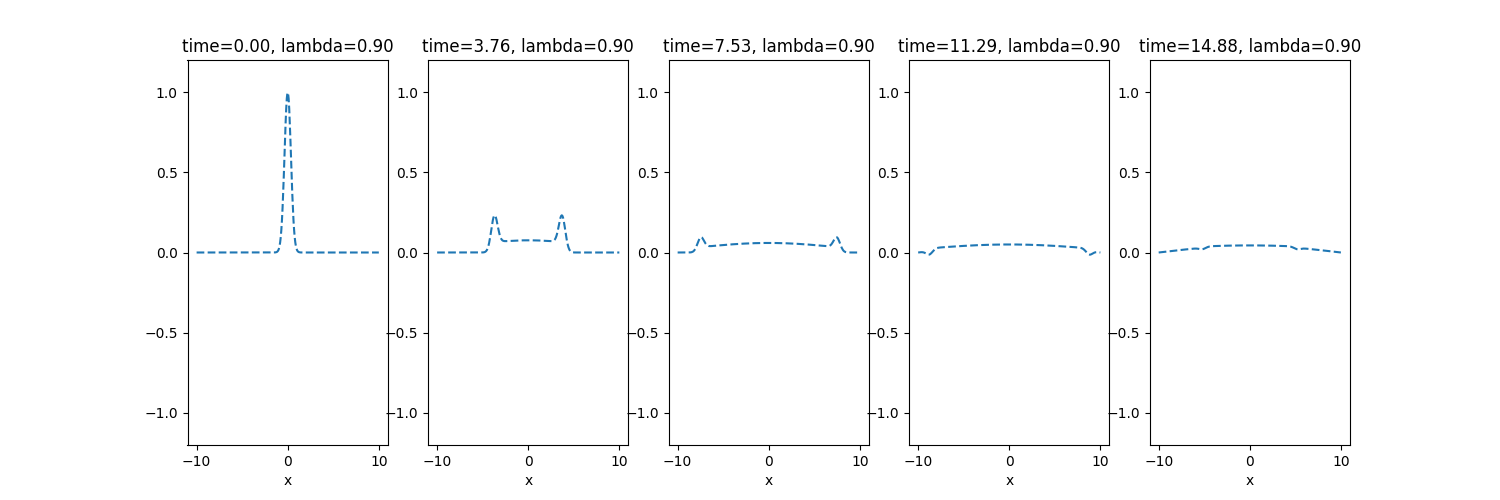

In [139]:
t=U[2]
M=t.shape[0]

Mspan=[0,0.25,0.5,0.75,0.99]
fig,ax=plt.subplots(1,5,figsize=(15,5))
for i in range(len(Mspan)):
    n=int(np.floor(M*Mspan[i]))
    ax[i].plot(x,U[0][:,n],label='Sol Num',linestyle='--')
    #ax[i].legend(loc='best',fontsize='small')
    ax[i].set_xlabel('x')
    #ax[i].set_ylabel('u')
    ax[i].set_ylim((-1.2,1.2))
    ax[i].set_title('time=%.2f, lambda=%.2f'%(U[2][n],U[3]))
plt.show()